# A) Importing Important libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# B) Accessing data from the datasheet:-

In [58]:
df = pd.read_csv(r'/content/CAR DETAILS.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


# C) Data preprocessing/cleansing

### a) Checking datas size, types and description


In [59]:
df.shape

(4340, 8)

In [60]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [61]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### b) Checking for null values

In [63]:
df.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [65]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

There is no null values in the dataset, so no need of null value handling process. next we forward towards the Duplicate values.

### c) Check the duplicate values

In [66]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool

In [67]:
df.duplicated().sum()

763

In [68]:
df.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [69]:
df.drop_duplicates(inplace=True) # removing duplicates from the df

let's save the cleaned dataset.

In [70]:
df.to_csv('Car_Cleaned_Data',index =False)

In [71]:
# let's check the data again
Car_Cleaned_Data=pd.read_csv(r'/content/Car_Cleaned_Data')

# D) After Data Cleaning let's move towards EDA process
Create some visualization and lets compare the dataset values

let's catorize the columns in numerical and catogorical columns

In [72]:
numeric_cols = Car_Cleaned_Data.select_dtypes(include=['number'])
catogeric_cols = Car_Cleaned_Data.select_dtypes(include=['object'])

### I ) let's do some univariate Data Analysis using Numerical columns

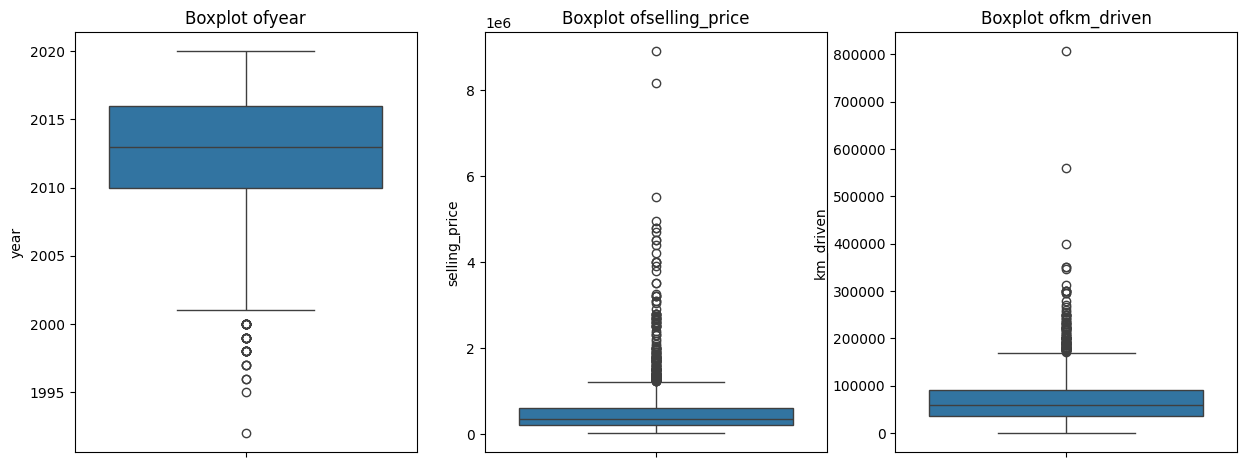

In [73]:
plt.figure(figsize=(15,12))
for i ,col in enumerate(numeric_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(y=Car_Cleaned_Data[col])
    plt.title(f'Boxplot of{col}')

plt.tight_layout
plt.show()

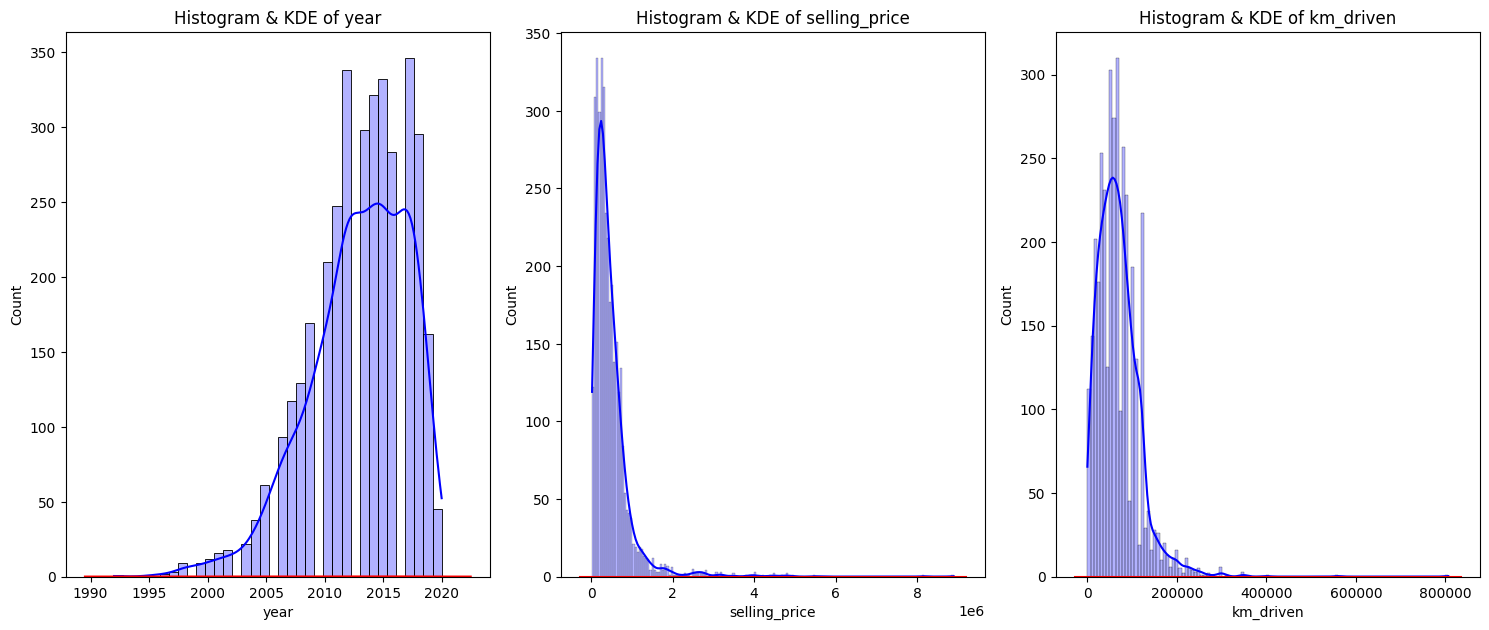

In [74]:
plt.figure(figsize=(15,12))
for i,col in enumerate(numeric_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(Car_Cleaned_Data[col],kde=True, color='blue', alpha=0.3)
    sns.kdeplot(Car_Cleaned_Data[col],color='Red')
    plt.title(f'Histogram & KDE of {col}')
plt.tight_layout()
plt.show()

### II ) Let's Do some Univariate Analysis according to Categorical columns

### 1. Distribution of Top 10 car names

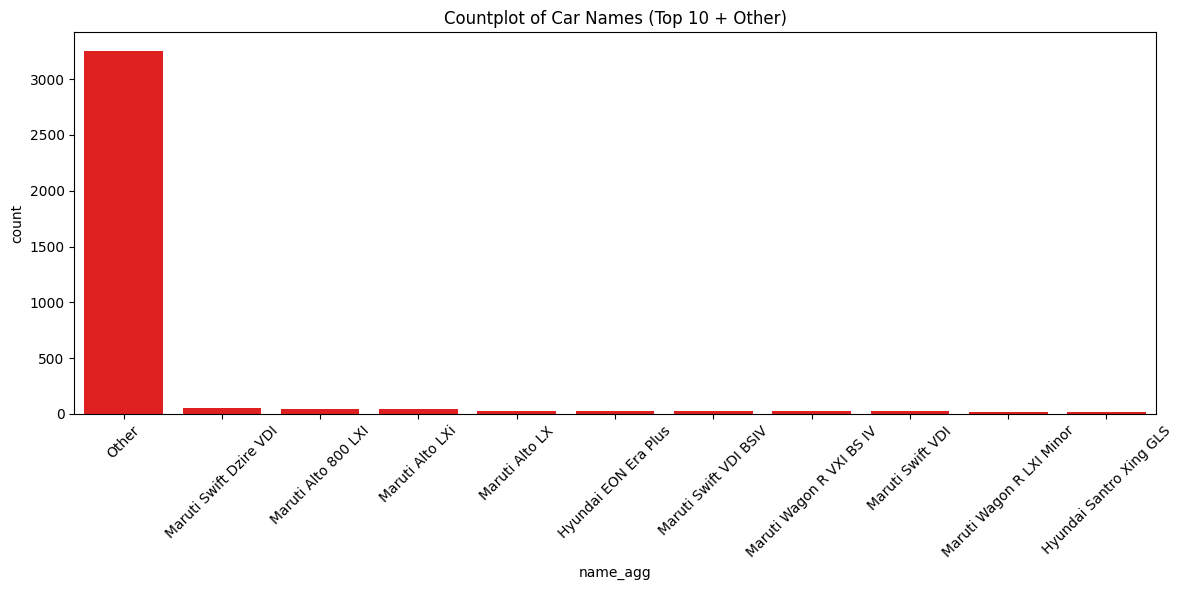

In [75]:
top_names = Car_Cleaned_Data['name'].value_counts().nlargest(10).index

# Create a new column with aggregated names
Car_Cleaned_Data['name_agg'] = Car_Cleaned_Data['name'].apply(lambda x: x if x in top_names else 'Other')

# Plot countplot for the aggregated names
plt.figure(figsize=(12, 6))
sns.countplot(x='name_agg', data=Car_Cleaned_Data, order=Car_Cleaned_Data['name_agg'].value_counts().index, color ='red')
plt.title('Countplot of Car Names (Top 10 + Other)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Distribution of fuel types

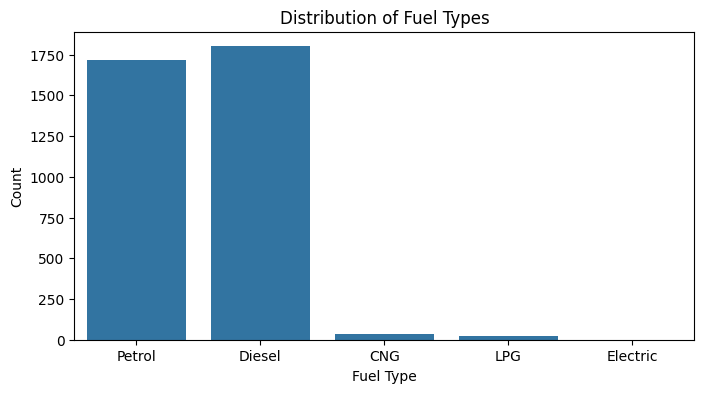

In [76]:
plt.figure(figsize=(8, 4))
sns.countplot(x='fuel', data=Car_Cleaned_Data)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

### 3. Distribution of transmission types

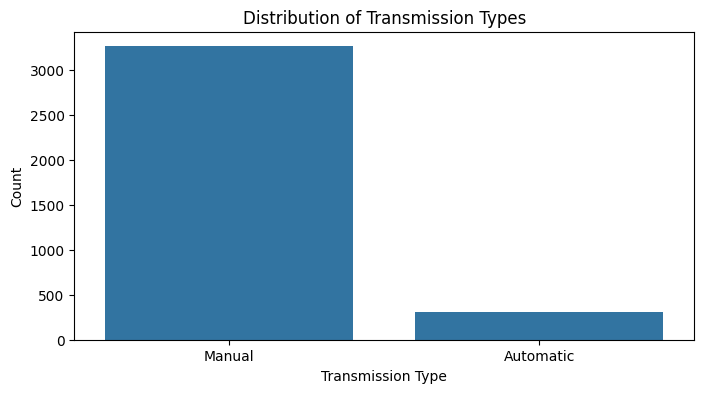

In [77]:

plt.figure(figsize=(8, 4))
sns.countplot(x='transmission', data=Car_Cleaned_Data)
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

### 4. Distribution of owner types

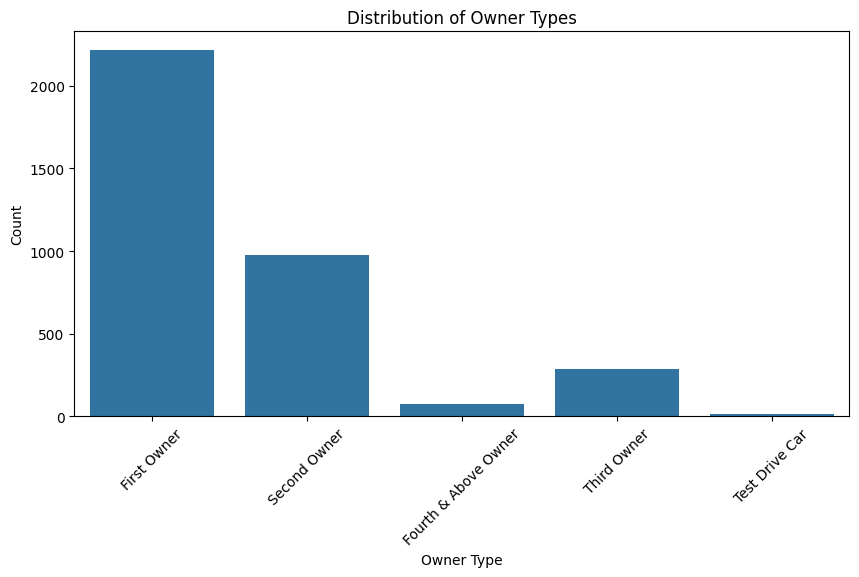

In [78]:
plt.figure(figsize=(10, 5))
sns.countplot(x='owner', data=Car_Cleaned_Data)
plt.title('Distribution of Owner Types')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### III ) Let's do some numric-numeric col analysis

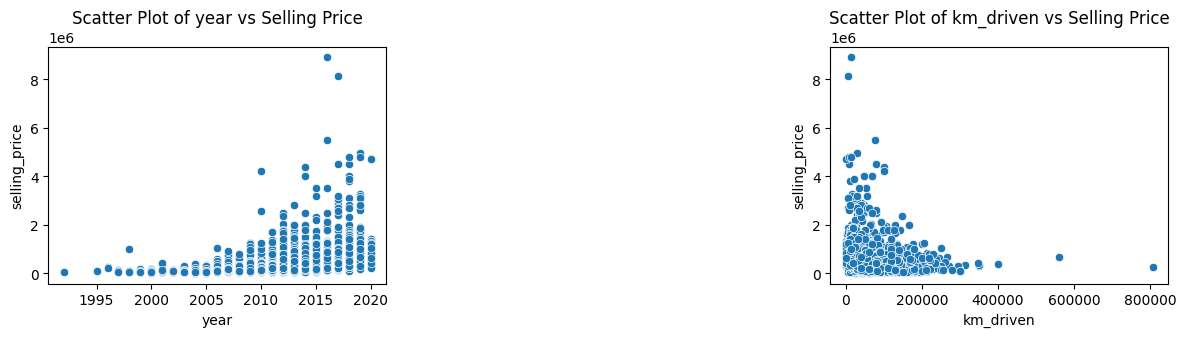

In [79]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    if col != 'selling_price':  # Assuming 'selling_price' is the target variable
        plt.subplot(2, 3, i)
        sns.scatterplot(x=Car_Cleaned_Data[col], y=Car_Cleaned_Data['selling_price'])
        plt.title(f'Scatter Plot of {col} vs Selling Price')
plt.tight_layout()
plt.show()

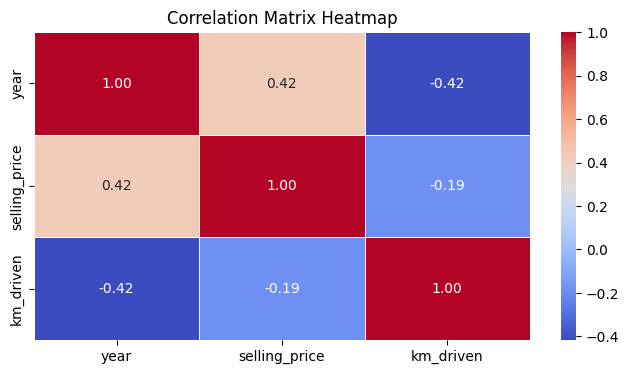

In [80]:
# Draw the heatmap
# Select only the numeric columns for correlation
numeric_cols = Car_Cleaned_Data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


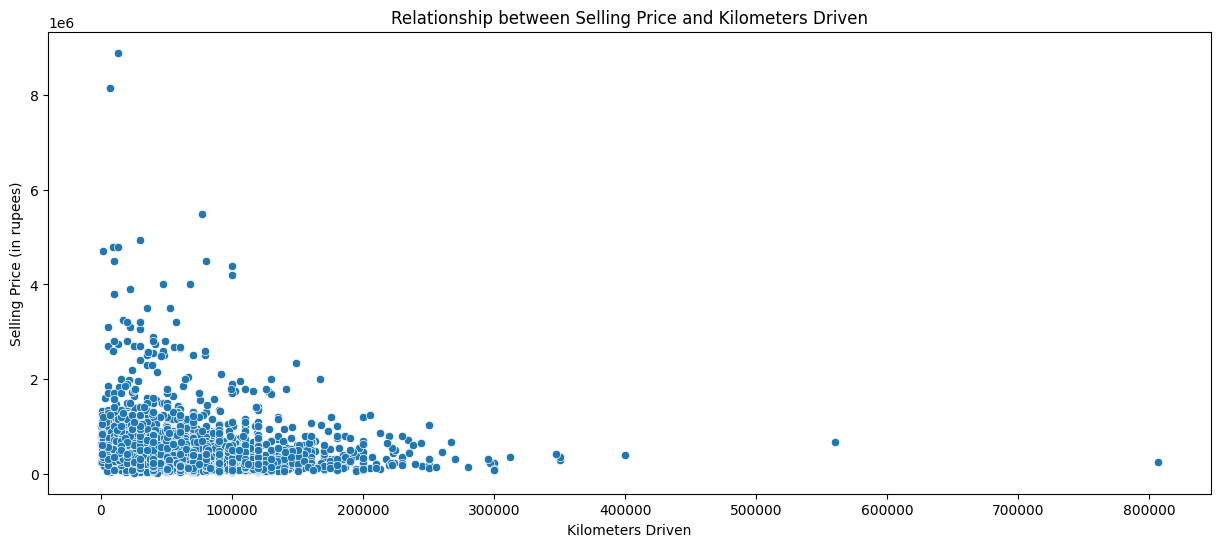

In [81]:
# Relationship between selling price and kilometers driven

plt.figure(figsize=(15, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=Car_Cleaned_Data)
plt.title('Relationship between Selling Price and Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (in rupees)')
plt.show()

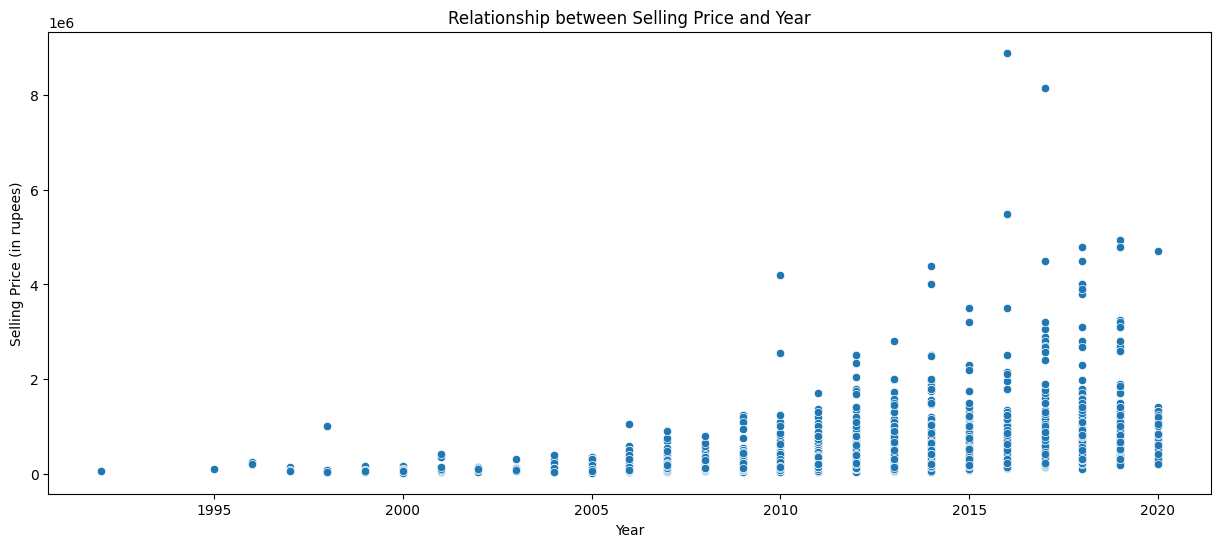

In [82]:
# Relationship between selling price and year

plt.figure(figsize=(15, 6))
sns.scatterplot(x='year', y='selling_price', data=Car_Cleaned_Data)
plt.title('Relationship between Selling Price and Year')
plt.xlabel('Year')
plt.ylabel('Selling Price (in rupees)')
plt.show()

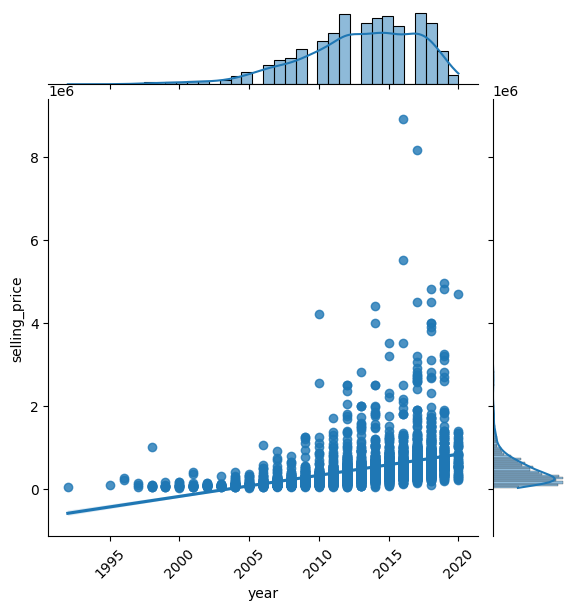

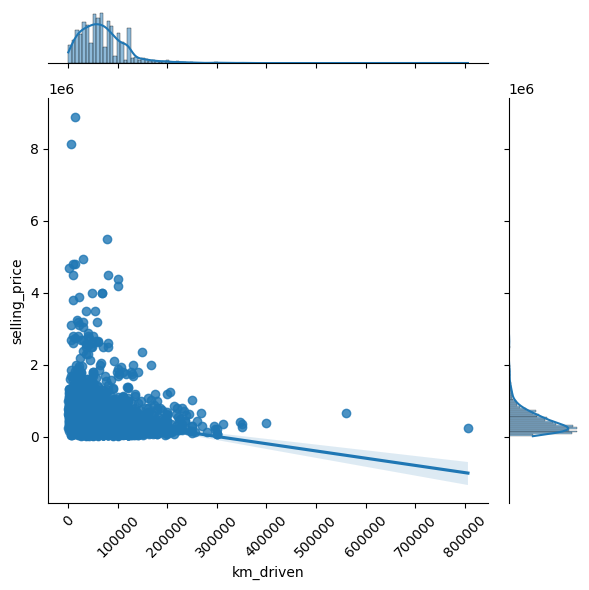

In [83]:
# Jointplot
for col in numeric_cols:
    if col != 'selling_price':  # Assuming 'selling_price' is the target variable
        sns.jointplot(x=Car_Cleaned_Data[col], y=Car_Cleaned_Data['selling_price'], kind='reg')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# E ) Outlier Treatment

### Identify the outlier using IQR

In [84]:
def identify_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers in a specific column
outliers_selling_price = identify_outliers_IQR(Car_Cleaned_Data, 'selling_price')
print(outliers_selling_price)


                                                name  year  selling_price  \
12                   Toyota Corolla Altis 1.8 VL CVT  2018        1650000   
16                        Jaguar XF 2.2 Litre Luxury  2014        1964999   
17              Mercedes-Benz New C-Class 220 CDI AT  2013        1425000   
22                   Audi A6 2.0 TDI  Design Edition  2013        1735000   
23    Mercedes-Benz New C-Class C 220 CDI Avantgarde  2012        1375000   
...                                              ...   ...            ...   
3487          Ford Ecosport 1.5 Diesel Titanium Plus  2019        1250000   
3491              Ford Endeavour 3.2 Titanium AT 4X4  2016        1800000   
3510                      Toyota Fortuner 2.7 2WD AT  2016        2500000   
3514                         Mahindra XUV500 W10 AWD  2015        1225000   
3550              Ford Endeavour 2.2 Titanium AT 4X2  2019        2800000   

      km_driven    fuel seller_type transmission         owner name_agg  
1

### Removing the outliers

In [85]:
def remove_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers

# Remove outliers from a specific column
car_data_no_outliers = remove_outliers_IQR(Car_Cleaned_Data, 'selling_price')
print(car_data_no_outliers)

                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
3572  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
3573           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
3574                  Maruti 800 AC BSIII  2009         110000      83000   
3575     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
3576                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner                  name_a

### Handling outliers by cap treatment

In [86]:
# Function to cap outliers using IQR
def cap_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return data

# Cap outliers in a specific column
car_data_capped = cap_outliers_IQR(Car_Cleaned_Data, 'selling_price')
print(car_data_capped)

                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007        60000.0      70000   
1                Maruti Wagon R LXI Minor  2007       135000.0      50000   
2                    Hyundai Verna 1.6 SX  2012       600000.0     100000   
3                  Datsun RediGO T Option  2017       250000.0      46000   
4                   Honda Amaze VX i-DTEC  2014       450000.0     141000   
...                                   ...   ...            ...        ...   
3572  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014       409999.0      80000   
3573           Hyundai i20 Magna 1.4 CRDi  2014       409999.0      80000   
3574                  Maruti 800 AC BSIII  2009       110000.0      83000   
3575     Hyundai Creta 1.6 CRDi SX Option  2016       865000.0      90000   
3576                     Renault KWID RXT  2016       225000.0      40000   

        fuel seller_type transmission         owner                  name_a

### As from the EDA we absorbed that there are outliers in KM_driven column,but they are much important for calculation so we will forward Car_Cleaned_Data dataset without outlier treatment

### Let's move for preprocessing for ML Models

In [87]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# F )  Encoding

In [88]:
df1 = pd.read_csv(r'/content/Car_Cleaned_Data')
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
3573,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3574,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3575,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [89]:
df1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [90]:
# prompt: drop name column from df1
df1.drop(columns=['name'], axis=1, inplace=True)


In [91]:
df1.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [92]:
# One-Hot Encoding for categorical variables
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(Car_Cleaned_Data[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Scaling numerical features
scaler = StandardScaler()
numerical_cols = ['year', 'selling_price', 'km_driven']
scaled_data = scaler.fit_transform(Car_Cleaned_Data[numerical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Combine scaled numerical data and encoded categorical data
processed_data = pd.concat([scaled_df, encoded_df], axis=1)


# G) Selecting X and Y for train and test

In [93]:
# Selecting features (X) and target variable (y)
X = Car_Cleaned_Data.drop(columns=['selling_price'])  # Assuming 'selling_price' is the target variable
y = Car_Cleaned_Data['selling_price']

# H) Splitting Data into Train and Test and scaling

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = StandardScaler()    # Preprocessing for numerical data

categorical_transformer = OneHotEncoder(handle_unknown='ignore')    # Preprocessing for categorical data

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


print('X_train_preprocessed shape:', X_train_preprocessed.shape)
print('X_test_preprocessed shape:', X_test_preprocessed.shape)


X_train_preprocessed shape: (2861, 1333)
X_test_preprocessed shape: (716, 1333)


# I ) Evaluate The Regression Models

In [95]:
# prompt: lets apply regression model to find mae,mas,r2,and predicted value

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a list of regression models
regression_models = [
    LinearRegression(),
    Ridge(alpha=10),
    Lasso(alpha=0.01),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(kernel='rbf')
]

# Train and evaluate each model
for model in regression_models:
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R2: {r2:.2f}")
    print(f"Predicted values: {y_pred}")
    print("-" * 30)


Model: LinearRegression
MAE: 106656.42
MSE: 25164469509.05
R2: 0.73
Predicted values: [ 347850.19844017  443109.62873263 1004922.55694738 1040929.04660326
  280228.54066637  390418.17426134  147751.00993999  605672.82943494
  607416.34179919  361103.04561281  180083.75375208  251648.15501785
  572050.98314007  244674.42183331  413339.97963815  746944.33510462
  450728.86677149  622886.48016663  209921.57693982  305743.30333121
  148533.26022407  302676.59845256  127131.11809211  673801.74669264
  273143.45494225  387288.70564187  518084.30508883  637284.06822306
  508485.05123059  140372.59660748  900222.08496448  156541.6238909
  118207.92044568  796591.87955057  270479.09895344  184716.65381436
  366541.72635768  337551.76397644  689516.92410579 1222842.21054196
  853805.05343716  162175.55273822  562988.43828702  532212.14471406
  671930.55486129  339746.41336072  252338.63978339  371162.50983239
  358946.61130789  473396.96286162  242860.34562295  548280.50727838
  678630.02453981 

### compare all regression models

In [96]:
# Print a table comparing the performance of all regression models

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Support Vector Regressor']
mae_scores = []
mse_scores = []
r2_scores = []

for model in regression_models:
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

data = {'Model': models, 'MAE': mae_scores, 'MSE': mse_scores, 'R2': r2_scores}

comparison_table = pd.DataFrame(data)

print(comparison_table.to_string())


                      Model            MAE           MSE        R2
0         Linear Regression  106656.424109  2.516447e+10  0.728649
1          Ridge Regression  131233.191904  3.101667e+10  0.665544
2          Lasso Regression  114029.850772  3.355886e+10  0.638131
3   Decision Tree Regressor  129188.148743  4.130885e+10  0.554562
4   Random Forest Regressor  109462.878155  2.712348e+10  0.707525
5  Support Vector Regressor  235083.844860  9.980569e+10 -0.076215


### find best model

In [97]:
best_model = None
best_r2 = 0

for model in regression_models:
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_model = model
        best_r2 = r2

print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best R2 Score: {best_r2:.2f}")


Best Model: LinearRegression
Best R2 Score: 0.73


###  save the best regression model

In [98]:
import pickle

# Save the best model to a file
with open('best_regression_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


# J ) Evaluate The Classification Models

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Binarize the target variable (example: high price vs. low price based on median)
Car_Cleaned_Data['selling_price_class'] = (Car_Cleaned_Data['selling_price'] > Car_Cleaned_Data['selling_price'].median()).astype(int)

# Separate features (X) and target variable (y)
X = Car_Cleaned_Data.drop(columns=['selling_price', 'selling_price_class'])
y = Car_Cleaned_Data['selling_price_class']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print('X_train_preprocessed shape:', X_train_preprocessed.shape)
print('X_test_preprocessed shape:', X_test_preprocessed.shape)

X_train_preprocessed shape: (2861, 1333)
X_test_preprocessed shape: (716, 1333)


### J.1 ) Classfication Model Evaluation

In [100]:
def evaluate_classification_model(model, X_train, X_test, y_train, y_test):
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = model.predict(X_train)

    # Predict on test data
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    print(f'Training Set Metrics:')
    print(f'Accuracy: {accuracy_train}')
    print(f'Precision: {precision_train}')
    print(f'Recall: {recall_train}')
    print(f'F1 Score: {f1_train}')

    print(f'Test Set Metrics:')
    print(f'Accuracy: {accuracy_test}')
    print(f'Precision: {precision_test}')
    print(f'Recall: {recall_test}')
    print(f'F1 Score: {f1_test}')

    return {'accuracy_train': accuracy_train, 'precision_train': precision_train, 'recall_train': recall_train, 'f1_train': f1_train,
            'accuracy_test': accuracy_test, 'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test}


### J.2 ) Train and Classification Models

In [101]:
# Initialize models
classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Bagging Classifier': BaggingClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
    }

# Evaluate each model
classification_results = {}
for model_name, model in classification_models.items():
    print(f'Evaluating {model_name}')
    classification_results[model_name] = evaluate_classification_model(model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
    print('\n')


Evaluating Logistic Regression
Training Set Metrics:
Accuracy: 0.905277874868927
Precision: 0.8951098511693835
Recall: 0.9112554112554112
F1 Score: 0.9031104755094744
Test Set Metrics:
Accuracy: 0.8798882681564246
Precision: 0.8724637681159421
Recall: 0.8775510204081632
F1 Score: 0.875


Evaluating Decision Tree
Training Set Metrics:
Accuracy: 0.9986018874519399
Precision: 1.0
Recall: 0.9971139971139971
F1 Score: 0.9985549132947976
Test Set Metrics:
Accuracy: 0.8365921787709497
Precision: 0.8424242424242424
Recall: 0.8104956268221575
F1 Score: 0.826151560178306


Evaluating Random Forest
Training Set Metrics:
Accuracy: 0.9986018874519399
Precision: 0.9971223021582734
Recall: 1.0
F1 Score: 0.9985590778097982
Test Set Metrics:
Accuracy: 0.8687150837988827
Precision: 0.8629737609329446
Recall: 0.8629737609329446
F1 Score: 0.8629737609329446


Evaluating K-Nearest Neighbors
Training Set Metrics:
Accuracy: 0.8898986368402656
Precision: 0.8805970149253731
Recall: 0.8939393939393939
F1 Score:

### J.3 ) Let's compare and Save the best Classification model

In [102]:
# Define a function to compare models
def compare_models(results):
    best_model_name = None
    best_model_score = 0

    print("Model Comparison:")
    for model_name, metrics in classification_results.items():
        print(f"\n{model_name}:")
        print(f"  Test Accuracy: {metrics['accuracy_test']}")
        print(f"  Test Precision: {metrics['precision_test']}")
        print(f"  Test Recall: {metrics['recall_test']}")
        print(f"  Test F1 Score: {metrics['f1_test']}")
        if metrics['f1_test'] > best_model_score:
            best_model_score = metrics['f1_test']
            best_model_name = model_name
    print(f"\nBest Model: {best_model_name} with F1 Score: {best_model_score}")
    return best_model_name

# Compare models
best_classification_model_name = compare_models(classification_results)

# Retrieve the model
best_model = classification_models[best_classification_model_name]
best_model.fit(X_train_preprocessed, y_train)

Model Comparison:

Logistic Regression:
  Test Accuracy: 0.8798882681564246
  Test Precision: 0.8724637681159421
  Test Recall: 0.8775510204081632
  Test F1 Score: 0.875

Decision Tree:
  Test Accuracy: 0.8365921787709497
  Test Precision: 0.8424242424242424
  Test Recall: 0.8104956268221575
  Test F1 Score: 0.826151560178306

Random Forest:
  Test Accuracy: 0.8687150837988827
  Test Precision: 0.8629737609329446
  Test Recall: 0.8629737609329446
  Test F1 Score: 0.8629737609329446

K-Nearest Neighbors:
  Test Accuracy: 0.8393854748603352
  Test Precision: 0.8257142857142857
  Test Recall: 0.8425655976676385
  Test F1 Score: 0.8340548340548342

Bagging Classifier:
  Test Accuracy: 0.8533519553072626
  Test Precision: 0.8650306748466258
  Test Recall: 0.8221574344023324
  Test F1 Score: 0.84304932735426

Gradient Boosting:
  Test Accuracy: 0.8575418994413407
  Test Precision: 0.855457227138643
  Test Recall: 0.8454810495626822
  Test F1 Score: 0.8504398826979472

Best Model: Logistic Re

LogisticRegression(max_iter=1000)

In [105]:
# To save the best regression model in pkl file
pickle_file = f"{best_classification_model_name}_best_classification_model.pkl"
with open('LogisticRegression_classification.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print(f"Best classification model saved as {pickle_file}")

Best classification model saved as Logistic Regression_best_classification_model.pkl


# K ) Take 20 random data from Car_csv and apply saved model

In [106]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [107]:
car_random_df = df.sample(n=20, random_state=42).reset_index(drop=True)
car_random_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Eeco 7 Seater Standard BSIV,2018,270000,20000,Petrol,Individual,Manual,First Owner
1,Maruti Swift VXi BSIV,2017,525000,39000,Petrol,Dealer,Manual,First Owner
2,Toyota Innova 2.5 G (Diesel) 8 Seater,2016,990000,146000,Diesel,Dealer,Manual,First Owner
3,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner
4,Honda Civic 1.8 S MT,2007,229999,70000,Petrol,Individual,Manual,Second Owner
5,Mahindra Xylo E4 8S,2010,325000,120000,Diesel,Individual,Manual,Third Owner
6,Hyundai Getz 1.3 GLS,2008,210000,53772,Petrol,Individual,Manual,First Owner
7,Fiat Punto EVO 1.3 Dynamic,2016,500000,35000,Diesel,Individual,Manual,First Owner
8,Honda Jazz 1.5 VX i DTEC,2018,790000,19571,Diesel,Dealer,Manual,First Owner
9,Honda Amaze E i-Vtech,2015,360000,80000,Petrol,Individual,Manual,Second Owner


Preprocess the random model, Load the saved model and Apply the Model on the Selected Data Points and Test the Model

In [108]:
# Separate features (X) and target variable (y)
X_sample = car_random_df.drop(columns=['selling_price'])
y_sample = car_random_df['selling_price']


# Identify categorical and numerical columns
categorical_cols = X_sample.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [109]:
# Load the saved best regression model
with open('best_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

### apply best regression model to the random dataset